In [4]:
import keras
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Setting seed for reproducability
np.random.seed(1234)  
PYTHONHASHSEED = 0
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Dropout, LSTM, Activation
%matplotlib inline
from decimal import Decimal
import warnings
warnings.filterwarnings("ignore")
import pickle
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import Normalizer, MinMaxScaler
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [5]:
df=pd.read_csv('C:\\Users\\lengada1\\NCSU\\ten_skus.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.weekday_name

day_dummy=pd.get_dummies(df.Day)
df=pd.concat([df,day_dummy],axis=1)
df.drop(['Day','Date'],inplace=True,axis=1)

df1=df.loc[df['id']==1]
df2=df.loc[df['id']==2]
df3=df.loc[df['id']==3]
df4=df.loc[df['id']==4]
df5=df.loc[df['id']==5]
df6=df.loc[df['id']==6]
df7=df.loc[df['id']==7]
df8=df.loc[df['id']==8]
df9=df.loc[df['id']==9]
df10=df.loc[df['id']==10]

In [6]:
# Data Prep
y1=df1['Sales']
y2=df2['Sales']
y3=df3['Sales']
y4=df4['Sales']
y5=df5['Sales']
y6=df6['Sales']
y7=df7['Sales']
y8=df8['Sales']
y9=df9['Sales']
y10=df10['Sales']

X1=df1.drop(['id','DayOfWeek','Customers','High_Var','Luxury','Sales'],inplace=False,axis=1)
X2=df2.drop(['id','DayOfWeek','Customers','High_Var','Luxury','Sales'],inplace=False,axis=1)
X3=df3.drop(['id','DayOfWeek','Customers','High_Var','Luxury','Sales'],inplace=False,axis=1)
X4=df4.drop(['id','DayOfWeek','Customers','High_Var','Luxury','Sales'],inplace=False,axis=1)
X5=df5.drop(['id','DayOfWeek','Customers','High_Var','Luxury','Sales'],inplace=False,axis=1)
X6=df6.drop(['id','DayOfWeek','Customers','High_Var','Luxury','Sales'],inplace=False,axis=1)
X7=df7.drop(['id','DayOfWeek','Customers','High_Var','Luxury','Sales'],inplace=False,axis=1)
X8=df8.drop(['id','DayOfWeek','Customers','High_Var','Luxury','Sales'],inplace=False,axis=1)
X9=df9.drop(['id','DayOfWeek','Customers','High_Var','Luxury','Sales'],inplace=False,axis=1)
X10=df10.drop(['id','DayOfWeek','Customers','High_Var','Luxury','Sales'],inplace=False,axis=1)

In [7]:
X1.head()

,Open,Promo,SchoolHoliday,Year,Month,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,2013,1,0,0,0,0,0,1,0
1,1,0,1,2013,1,0,0,0,0,0,0,1
2,1,0,1,2013,1,0,0,0,0,1,0,0
3,1,0,1,2013,1,1,0,0,0,0,0,0
4,1,0,1,2013,1,0,0,1,0,0,0,0


In [8]:
for obs in range(1,8):
    X1["Sales_T"+str(obs)]=df1['Sales'].shift(obs)
for obs in range(1,8):
    X2["Sales_T"+str(obs)]=df2['Sales'].shift(obs)
for obs in range(1,8):
    X3["Sales_T"+str(obs)]=df3['Sales'].shift(obs)
for obs in range(1,8):
    X4["Sales_T"+str(obs)]=df4['Sales'].shift(obs)
for obs in range(1,8):
    X5["Sales_T"+str(obs)]=df5['Sales'].shift(obs)
for obs in range(1,8):
    X6["Sales_T"+str(obs)]=df6['Sales'].shift(obs)
for obs in range(1,8):
    X7["Sales_T"+str(obs)]=df7['Sales'].shift(obs)
for obs in range(1,8):
    X8["Sales_T"+str(obs)]=df8['Sales'].shift(obs)
for obs in range(1,8):
    X9["Sales_T"+str(obs)]=df9['Sales'].shift(obs)
for obs in range(1,8):
    X10["Sales_T"+str(obs)]=df10['Sales'].shift(obs)

X1['Mov_avg']=pd.rolling_mean(df1['Sales'], window=7).shift(1) 
X2['Mov_avg']=pd.rolling_mean(df2['Sales'], window=7).shift(1) 
X3['Mov_avg']=pd.rolling_mean(df3['Sales'], window=7).shift(1) 
X4['Mov_avg']=pd.rolling_mean(df4['Sales'], window=7).shift(1) 
X5['Mov_avg']=pd.rolling_mean(df5['Sales'], window=7).shift(1) 
X6['Mov_avg']=pd.rolling_mean(df6['Sales'], window=7).shift(1) 
X7['Mov_avg']=pd.rolling_mean(df7['Sales'], window=7).shift(1) 
X8['Mov_avg']=pd.rolling_mean(df8['Sales'], window=7).shift(1) 
X9['Mov_avg']=pd.rolling_mean(df9['Sales'], window=7).shift(1) 
X10['Mov_avg']=pd.rolling_mean(df10['Sales'], window=7).shift(1) 

y1=y1[7:]
y2=y2[7:]
y3=y3[7:]
y4=y4[7:]
y5=y5[7:]
y6=y6[7:]
y7=y7[7:]
y8=y8[7:]
y9=y9[7:]
y10=y10[7:]

y1.reset_index(drop=True, inplace=True)
y2.reset_index(drop=True, inplace=True)
y3.reset_index(drop=True, inplace=True)
y4.reset_index(drop=True, inplace=True)
y5.reset_index(drop=True, inplace=True)
y6.reset_index(drop=True, inplace=True)
y7.reset_index(drop=True, inplace=True)
y8.reset_index(drop=True, inplace=True)
y9.reset_index(drop=True, inplace=True)
y10.reset_index(drop=True, inplace=True)

X1=X1.iloc[7:,:]
X2=X2.iloc[7:,:]
X3=X3.iloc[7:,:]
X4=X4.iloc[7:,:]
X5=X5.iloc[7:,:]
X6=X6.iloc[7:,:]
X7=X7.iloc[7:,:]
X8=X8.iloc[7:,:]
X9=X9.iloc[7:,:]
X10=X10.iloc[7:,:]

X1.reset_index(drop=True, inplace=True)
X2.reset_index(drop=True, inplace=True)
X3.reset_index(drop=True, inplace=True)
X4.reset_index(drop=True, inplace=True)
X5.reset_index(drop=True, inplace=True)
X6.reset_index(drop=True, inplace=True)
X7.reset_index(drop=True, inplace=True)
X8.reset_index(drop=True, inplace=True)
X9.reset_index(drop=True, inplace=True)
X10.reset_index(drop=True, inplace=True)

In [9]:
X1.head()

,Open,Promo,SchoolHoliday,Year,Month,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Sales_T1,Sales_T2,Sales_T3,Sales_T4,Sales_T5,Sales_T6,Sales_T7,Mov_avg
0,1,1,1,2013,1,0,0,0,0,0,1,0,7176.0,0.0,4997.0,4486.0,4327.0,5530.0,0.0,3788.000000
1,1,1,1,2013,1,0,0,0,0,0,0,1,5580.0,7176.0,0.0,4997.0,4486.0,4327.0,5530.0,4585.142857
2,1,1,1,2013,1,0,0,0,0,1,0,0,5471.0,5580.0,7176.0,0.0,4997.0,4486.0,4327.0,4576.714286
3,1,1,1,2013,1,1,0,0,0,0,0,0,4892.0,5471.0,5580.0,7176.0,0.0,4997.0,4486.0,4657.428571
4,1,0,0,2013,1,0,0,1,0,0,0,0,4881.0,4892.0,5471.0,5580.0,7176.0,0.0,4997.0,4713.857143


In [10]:
model = Sequential()
model.add(Dense(20, input_dim=X1.shape[1], activation='linear'))
model.add(Dense(20, activation='relu'))
model.add(Dense(40, activation='linear'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mae','mse'])
model.fit(X1, y1, epochs=700, batch_size=20, verbose=0)
scores = model.evaluate(X1, y1)
print("%s: %.0f"%  (model.metrics_names[1], scores[1]))
print("%s: %.1f"%  (model.metrics_names[2], scores[2]/1000000))

935/935 [==============================] - 0s 39us/step
mean_absolute_error: 450
mean_squared_error: 0.5


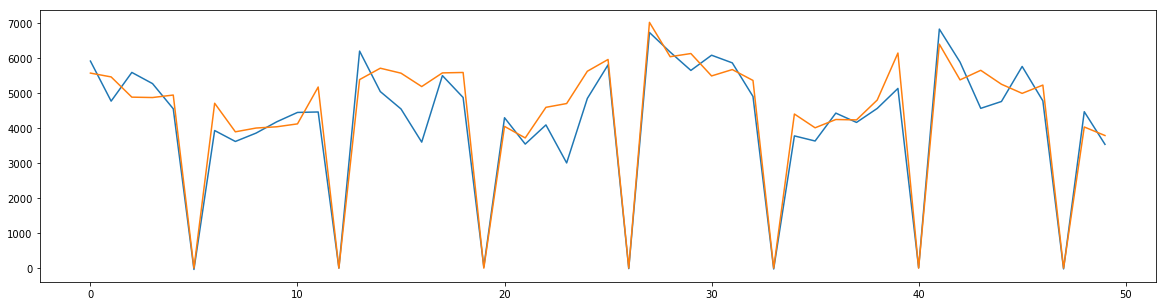

In [11]:
prediction=model.predict(X1, verbose=0)
pred2=pd.DataFrame(prediction)
pred3=pd.concat([pred2,y1],axis=1)
plt.figure(figsize=(20,5))
plt.plot(pred3.iloc[:50,0]   ) 
plt.plot(pred3.iloc[:50,1]   )

In [12]:
def train_model(X, y):
    model = Sequential()
    model.add(Dense(20, input_dim=X.shape[1], activation='linear'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(40, activation='linear'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mae','mse'])
    model.fit(X, y, epochs=600, batch_size=25, verbose=0)
    prediction=model.predict(X, verbose=0)
    pred2=pd.DataFrame(prediction)
    scores = model.evaluate(X, y)
    return[pd.concat([pred2,y],axis=1),"%s: %.0f"%  (model.metrics_names[1], scores[1])]

In [13]:
model1=train_model(X1, y1); 
model2=train_model(X2, y2); 
model3=train_model(X3, y3); 
model4=train_model(X4, y4); 
model5=train_model(X5, y5); 
model6=train_model(X6, y6); 
model7=train_model(X7, y7); 
model8=train_model(X8, y8); 
model9=train_model(X9, y9); 
model10=train_model(X10,y10); 

935/935 [==============================] - 0s 174us/step


In [14]:
print(model1[1])
print(model2[1])
print(model3[1])
print(model4[1])
print(model5[1])
print(model6[1])
print(model7[1])
print(model8[1])
print(model9[1])
print(model10[1])

mean_absolute_error: 467
mean_absolute_error: 480
mean_absolute_error: 737
mean_absolute_error: 1018
mean_absolute_error: 444
mean_absolute_error: 504
mean_absolute_error: 834
mean_absolute_error: 498
mean_absolute_error: 695
mean_absolute_error: 535


In [15]:
sku_pred=pd.concat([ model1[0].iloc[:,:1], model2[0].iloc[:,:1], model3[0].iloc[:,:1],model4[0].iloc[:,:1] ,model5[0].iloc[:,:1], 
                   model6[0].iloc[:,:1] ,model7[0].iloc[:,:1] ,model8[0].iloc[:,:1] ,model9[0].iloc[:,:1],
                   model10[0].iloc[:,:1] ],axis=1)  
sku_pred['Total'] = sku_pred.sum(axis=1)
sku_pred.to_csv('C:\\Users\\lengada1\\NCSU\\prediction_skus.csv')
sku_pred.shape


(935, 11)

In [16]:
# serialize model to JSON
model_json = model.to_json()
with open("NCSU_DC.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("NCSU_DC.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
# load json and create model
json_file = open('NCSU_DC.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("NCSU_DC.h5")
print("Loaded model from disk")

Loaded model from disk


In [18]:
# evaluate loaded model on test data
loaded_model.compile(loss='mse', optimizer='adam', metrics=['mae','mse'])
score = loaded_model.evaluate(Xs, y, verbose=0)
print("%s: %.0f"%  (loaded_model.metrics_names[1], score[1]))
print("%s: %.1f"%  (loaded_model.metrics_names[2], score[2]/10000000))

NameError: name 'Xs' is not defined

In [ ]:
#   USEFUL CODE FOR LATER
#data_train['Year'] = data_train['Date'].apply(lambda x: int(x[:4]))
#data_train['Month'] = data_train['Date'].apply(lambda x: int(x[5:7]))
#data_train['StateHoliday'] = data_train['StateHoliday'].replace(0, '0')
#data_train["HolidayBin"] = data_train['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})
#data_train.StateHoliday.unique()

#average_customers_per_month = data_train.groupby('Month')['Customers'].mean()
#average_sales_per_month = data_train.groupby('Month')['Sales'].mean()